# GP Salary Data Data Reusability Project

## Visualizing and Extracting Spreadsheet Data:
## An informal investigation


### Steve Holden
### Senior Developer Advocate
### Duedil Litd.

## PyData London 4 August, 2015.


# Introduction

## 20-year Python user
## 48 years programming
## Senior Developer Advocate at Duedil Ltd
### * For almost a month now!
### * Two weeks of that on a non-work trip

## I am not primarily a data scientist

## This talk may contain more `"Py"` than `"Data"`
#### Sorry

## Data contained in "open data" publications from the UK Department of Health

##Wanted to allow researchers to:
### Automate computations
### Respond more speedily to changes

# Motivation

## Easy re-use of "open data"

## Experimentation needed

### Started to work with `openpyxl`

In [1]:
import openpyxl as xl

# A Slight Hitch

## `openpyxl` cannot read ".xls" files

### `wb = xl.load_workbook("data/gpearnextime.xls")` raises an exception
### Converted it to a ".xlsx" file with Excel before further processing.

### `xlrd` module can read ".xls" files
### No easy way to write them!

### I punted on this issue. Sue me

In [2]:
wb = xl.load_workbook("data/gpearnextime.xlsx")

/Users/sholden/Projects/HealthData/hd.env/lib/python3.4/site-packages/openpyxl/workbook/names/named_range.py:121: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


# I Discovered Later ...

## `Pandas` can read Excel spreadheets
## I presumed I no longer needed `openpyxl`.
## But Pandas returns a `dict` of spreadsheets
## I still needed `openpyxl` to determine sheet ordering

In [3]:
wb.sheetnames

['Contents',
 'Definitions and Changes',
 '1a. GPMS Cash Terms ',
 '1b. GPMS Real Terms',
 'Real terms working - HIDE',
 '1c. GMS',
 '1d. PMS',
 '2a. GPMS Expenses',
 '2b. GMS Expenses',
 '2c. PMS Expenses',
 '3a. GPMS by Age ',
 '3b. GPMS by Age ',
 '4a. GPMS by Rurality ',
 '4b. GPMS by Rurality ',
 '5a. GPMS by Practice Size',
 '5b. GPMS by Practice Size',
 '6a. GPMS by SHA_GOR',
 '6b. GPMS by SHA_GOR ',
 '7a. GPMS by NHS ER',
 '7b. GPMS by NHS ER',
 '8. GPMS Distribution',
 '9a. All Salaried',
 '9b. Salaried by Country ',
 '9c. Salaried by Age',
 '9d. Salaried by Rurality',
 '9e. Salaried by SHA_GOR',
 '9f. Salaried by NHS ER',
 '10. Salaried Distribution ',
 '11. Combined GPs']

In [4]:
ws = wb.get_sheet_by_name('1a. GPMS Cash Terms ')

In [5]:
ws["B7"].value

'All Practice Types'

In [6]:
ws["B3"].value

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

In [7]:
for i in range(1, 200):
    print(ws["B{}".format(i)].value, ws["C{}".format(i)].value)

Return to contents None
None None
GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND None
None None
GPMS UK None
Practice Type Year
All Practice Types 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/031
None 2003/041
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Non-Dispensing 2002/031,2
None 2003/041,2
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
None None
None None
GPMS ENGLAND None
Practice Type Year
All Practice Types 2002/03
None 2003/04
None 2004/05
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/11
None 2011/12
None 2012/13
All Dispensing 2002/03
None 2003/04
None 2004/053
None 2005/06
None 2006/07
None 2007/08
None 2008/09
None 2009/10
None 2010/

# Date values and the footnote numbers run together

## Gives a single string value
## Need to separate it into a `(date, [footnotes])` pair

##  From an openness point of view:
### Much better to have a separate column for the footnotes
### Then again, it might be better not to use Excel spreadsheets 

# Sometimes I'm happy to build bottom-up
## "Gets to grips" with one small aspect of a problem
## A little _hand-to-hand combat_ with the problem
## Notch up a small gain before returning to the bigger picture

In [8]:
def year_refs(s):
    """Separate the year string into the year plus the list of references"""
    if len(s) == 7:
        return s, []
    else:
        return s[:7], s[7:].split(",")

In [9]:
year_refs("2009/101,3,4")

('2009/10', ['1', '3', '4'])

In [10]:
year_refs("2001/11")

('2001/11', [])

# Not all data is numeric

## Spreadsheets are not the ideal way to communicate

## But life has sent me lemons

### So I'm making lemonade - despite a few issues

In [11]:
ws["d81"].value

'-'

## Will probably need to replace these values

### Make them `Nan`s with `pandas.DataFrame.replace()` or similar

### Then (possibly) use interpolation to substitute "likely" values

### Or simply use a function and substitute a specific value

In [12]:
def num_val(val):
    return 0 if val == "-" else val

In [13]:
num_val(32.456)

32.456

### Strategy will depend on the needs of the specific issue

In [14]:
num_val("-")

0

# So, where's the data?

## Need to:

## Look at how we can find the relevant areas in a worksheet

## Analyze the content of those areas

### They will vary in size, increasing as the years go by
### Otherwise a static description of the shapes of the sheet might have done

In [15]:
cell = ws["B3"]

In [16]:
cell.value # Sheet heading

'GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS \nUK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND'

In [17]:
ws["B5"].value # Table heading

'GPMS UK'

# Try to Identify the Important Stuff

In [18]:
cells = ws.get_cell_collection()

## `cells` now contains every cell in the worksheet

In [19]:
from collections import defaultdict

cols_in_row = defaultdict(list)

for cell in cells:
    if cell.value is not None:
        cols_in_row[cell.row].append(cell.column)

cols_in_row[8]

['F', 'D', 'G', 'E', 'C']

## So how many rows do we have to consider?

In [20]:
max_row = max(c for c in cols_in_row.keys())
max_row

198

# Dealing with spurious values
## Cell J43 has a spurious value that should really be ignored
## Wonder how long that's been there and who knows it is?
## You can correct manually for that sort of stuff
### It's much better to try and think of a rule
### We'll get there ... for now, manual removal will do

In [21]:
cols_in_row[43].remove('J')
cols_in_row[43]

['D', 'G', 'C', 'B', 'E', 'F']

# How many columns do we have to consider?

In [22]:
max_col = max(c for r in range(max_row) for c in cols_in_row[r])
max_col

'G'

In [23]:
cols = ord(max_col)-ord("@")
cols

7

# Initial Visualization

## Python has some easy graphics
## I wanted a quick and dirty way to get an idea of the shape of the problem
### - Quite literally

## Built a quick and dirty visual mapping of cells as pixels in a graphic

In [24]:
pixels = [] # straight list of pixel values for graphic
matrix = [] # True/False cell representation (1/0)
for row_num in range(max_row):
    cols = cols_in_row[row_num]
    row_string = []
    row_matrix = []
    for col_name in "ABCDEFG":
        row_string.append("*" if col_name in cols else " ")
        row_matrix.append(col_name in cols)
    #print("  ".join(row_string))
    matrix.append(row_matrix)
    pixels += [1-p for p in row_matrix] + [1]*7 # add pixel row plus blank row

### Several issues with this code
### Notably the hard-wired values
### Making use of “arcane knowledge”

# Building the Graphic

## `PIL` (now `pillow`) is the go-to graphics tool in Python

### Again, note the use of “arcane knowledge”
### Allowable during experimentation

In [25]:
from PIL import Image
im = Image.new("1", (7, 198*2))
im

In [26]:
im.putdata(pixels)
im

# Surely we can do better than this?

## Let's try simply scaling the image

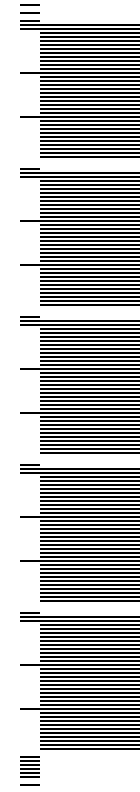

In [27]:
im.resize((7*20, 198*4))

# Visualization makes the pattern of the tables more obvious
## Each begins with a row with a single cell
## Followed by two rows with six cells
## Then a number of rows with five cells
## Then another row with six cells
## Then more rows with five cells
## ...
## Finally, a blank row terminates a table

# Possible Solution:
## Construct a vector with the number of cells in each row
## Then search it for patterns characteristic of the start of a table

## Whenever you find yourself thinking "pattern"
## It's worth considering using Python's `re` module
### Another effbot contribution
## Construct a ___string of row lengths___
### Then use pattern matching to find the table starting position
### Task then simplifies to finding the string `"1665"`

In [28]:
str_sizes = "".join(str(sum(x for x in row)) for row in matrix) # only works for widths up to 9 ...
str_sizes

'010101665555555555655555555556555555555500166555555555565555555555655555555550016655555555556555555555565555555555001665555555555655555555556555555555500166555555555565555555555655555555550111111010'

In [29]:
import re
for m in re.finditer("(1665)", str_sizes):
    print(m.start())

5
42
79
116
153


# Is there an easier way to determine the shape?
### Without all these complex manipulations
## I often find my second approach to a problem is more intelligent
### So I often write a prototype _and then throw it away_
## Everything above is prototypical

# Let's try another way

In [30]:
len(ws.columns)

16

## How many cells per column?

In [31]:
col_counts =[sum(cell.value is not None for cell in column) for column in ws.columns]

## Eliminate _invalid_ columns
### Those with no more than one value in them
### Eliminates the messy little tick mark in column

In [32]:
valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
valid_cols

[1, 2, 3, 4, 5, 6]

## Eliminate empty rows

In [33]:
# True is 1, False is 0
row_counts =[sum(cell.value is not None for cell in row) for row in ws.rows]
valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
len(valid_rows)

185

# Improve the Representation

## Also generate a count of the non-blank cells in a row

In [34]:
ncols = len(valid_cols)
max_row_num = max(valid_rows)
pixels = []
row_counts = []
for row in range(max_row_num):
    cell_strings = []
    row_pixels = []
    for col in valid_cols: # use .extend on a generator expression?
        value = ws.rows[row][col].value
        row_pixels.append(value is None)
    pixels += row_pixels*3 + [1]*ncols # blank line
    row_counts.append(sum(1-pixel for pixel in row_pixels))

# New representation is "chunkier"
## Each cell is three rows of pixels
## A single blank row between cells.

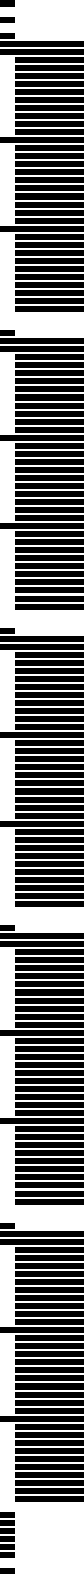

In [35]:
im = Image.new("1", (ncols, 4*(max_row_num)))
im.putdata(pixels)
im.resize((14*ncols, 8*(max_row_num+1)))

# Putting it all together

In [36]:
%matplotlib inline

In [37]:
def visualize(ws):
    col_counts =[sum(cell.value is not None for cell in column)
                 for column in ws.columns]
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    row_counts =[sum(cell.value is not None for cell in row)for row in ws.rows]
    valid_rows = [i for (i, ct) in  enumerate(row_counts) if ct > 0]
    ncols = len(valid_cols)
    max_row_num = max(valid_rows)
    pixels = []
    row_counts = []
    for row in range(max_row_num):
        cell_strings = []
        row_pixels = []
        for col in valid_cols:
            value = ws.rows[row][col].value
            row_pixels.append(value is None)
        pixels += row_pixels*3 + [1]*ncols # blank line
        row_counts.append(sum(1-pixel for pixel in row_pixels))
    im = Image.new("1", (ncols, 4*(max_row_num)))
    im.putdata(pixels)
    return im.resize((14*ncols, 8*(max_row_num+1))), row_counts

# Now Iterate Across all Worksheets

In [38]:
images = []; row_counts = []
for ws in wb.worksheets:
    if ws.sheet_state != "hidden": # exclude hidden sheets
        image, counts = visualize(ws)
        images.append(image)
        row_counts.append(counts)

# Now Have a List of Worksheet Images
## And a list of row-counts for each
## How about a view of the whole workbook?

In [39]:
LEFT_MARGIN = 4
im_width = sum(i.size[0] for i in images)+(len(images)-1)*LEFT_MARGIN
im_height = max(i.size[1] for i in images)
im_width, im_height

(3370, 2680)

In [40]:
len(row_counts)

28

## Get the width of each table

In [41]:
table_widths = [max(c) for c in row_counts]

# Now Create the Overview

In [42]:
x_offset = 0
big_image = Image.new("1", (im_width, im_height), 1)
for i, im in enumerate(images):
    big_image.paste(im, (x_offset, 0))
    x_offset += im.size[0]+LEFT_MARGIN

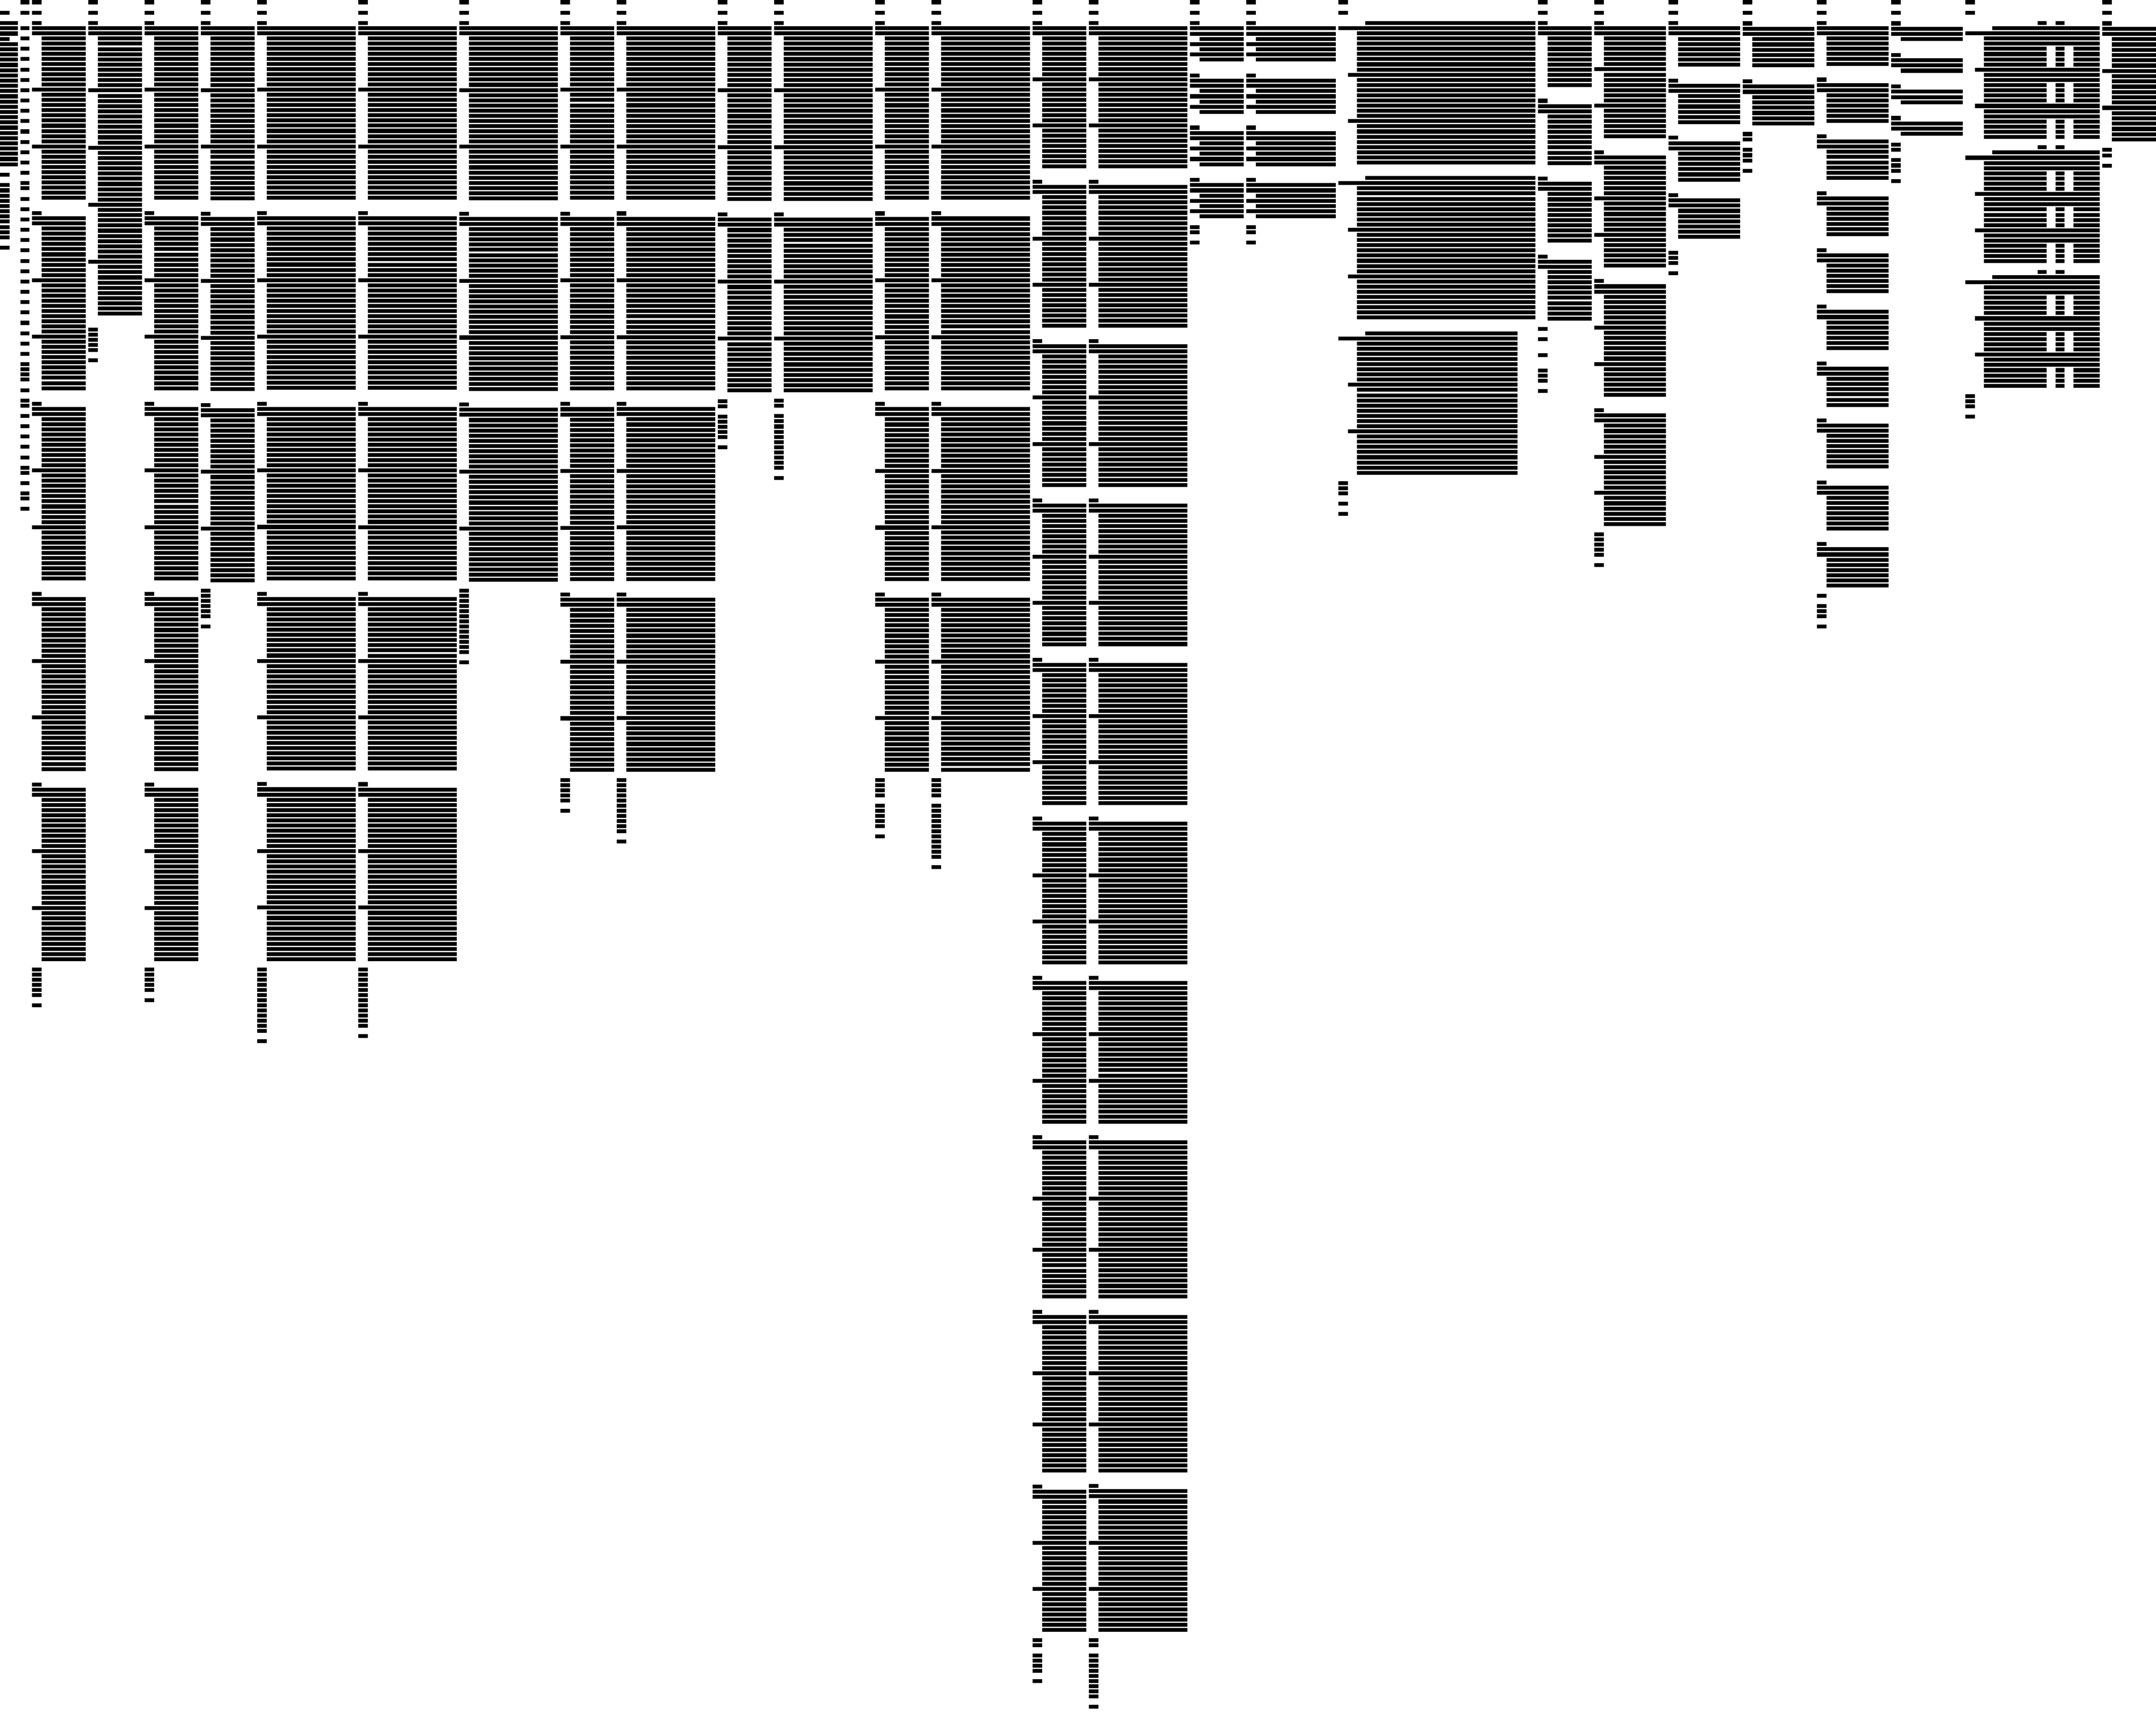

In [43]:
big_image

# Let's Try Another Way

In [44]:
ws = wb.worksheets[2]
ws

<Worksheet "1a. GPMS Cash Terms ">

In [45]:
# Page header is in B3 always?
page_header = ws["B3"].value
print(page_header)

GP EARNINGS AND EXPENSES 2002/03 TO 2012/13 CASH TERMS 
UK, ENGLAND, SCOTLAND, WALES, NORTHERN IRELAND


In [46]:
counts_string = "".join(str(n) for n in row_counts[2])
counts_string

'10101665555555555655555555556555555555500166555555555565555555555655555555550016655555555556555555555565555555555001665555555555655555555556555555555500166555555555565555555555655555555550111111010'

## Note we are still using  hard-coded `"1665"` value

In [47]:
table_starts = [x.start(0) for x in re.finditer("1665", counts_string)]
table_starts

[4, 41, 78, 115, 152]

## With a More Complex Pattern we can Split Out Tables

In [48]:
table_lens = [x.end("X")-x.start("X") for x in re.finditer("16(?P<X>65[56]+)", counts_string)]
table_lens

[33, 33, 33, 33, 33]

In [49]:
number_of_tables = len(table_starts)
number_of_tables

5

# How Do We Construct a Usable Data Source?

## Need to know the following:
### Number of groups
### Number of rows in each group
### Number of columns in the table.
## This Represents a 3-Dimensional Structure
### _e.g._ First table reports figures over the whole UK
### Remainder analyze that information geographically
#### Adding a fourth dimension to the data.

# Heading Towards a General Structure

## Work on the first table
### Learn what we'll need to do in the general case.

## How to access the various "chunks" of the table
### Beginning with its title

In [50]:
start_row = table_starts[0]
table_len = table_lens[0]
ws["B5"].value, ws["B5"], ws.columns[1][4], ws.columns[1][start_row]

('GPMS UK',
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>,
 <Cell 1a. GPMS Cash Terms .B5>)

In [51]:
title_cell = ws.columns[1][start_row]
title_cell.value

'GPMS UK'

# Extract the Column Names
## On the row following the title

In [52]:
table_cols = 6
headers = [c.value for c in ws.rows[start_row+1][1:table_cols+1]]
# really should have computed that "6" from the pattern ...
headers

['Practice Type',
 'Year',
 'Estimated Population',
 'Gross Earnings',
 'Total Expenses',
 'Income Before Tax']

# How Many Groups Are There?

In [53]:
pat = "(?P<X>(65+)+)"
m = re.search(pat, counts_string, start_row+2)
assert m.groups(0)[0].replace(m.groups(0)[1], "") == "" # only true for fixed groups

In [54]:
group_count = len(m.groups(0)[0])//len(m.groups(0)[1])
group_count

3

In [55]:
group_len = table_len//group_count
group_len

11

# Build a `pandas` DataFrame

In [56]:
import pandas as pd
first_data_row = start_row+2
dataframes = []
for data_start_row in range(first_data_row, first_data_row+table_len, group_len):
    group_cells = [[ws.rows[row][col].value for col in range(1, table_cols+1)]
                   for row in range(data_start_row, data_start_row+group_len)]
    group = pd.DataFrame(group_cells, columns=headers)
    group[headers[0]] = group[headers[0]][0]
    dataframes.append(group)

In [57]:
big_frame = pd.concat(dataframes)

In [58]:
big_frame.index = range(table_len)

# The Result

In [59]:
big_frame

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362,184154,111439,72716
1,All Practice Types,2003/041,31594.98,203613.5,121594.8,82018.71
2,All Practice Types,2004/05,33887.99,230096.7,129926.2,100169.5
3,All Practice Types,2005/06,33874.98,245019.6,135016,110003.6
4,All Practice Types,2006/07,33887,247361.6,139694.4,107667.2
5,All Practice Types,2007/08,33622,251997.3,145925.4,106071.9
6,All Practice Types,2008/09,33371,258600,153300,105300
7,All Practice Types,2009/10,33050,262700,156900,105700
8,All Practice Types,2010/11,33000,266500,162400,104100
9,All Practice Types,2011/12,32950,267900,164900,103000


## Replacing Those Pesky Minus Signs

In [60]:
import numpy as np
big_frame["Estimated Population"][22:33].replace("-", np.NaN).interpolate()

22         NaN
23         NaN
24    28558.76
25    28571.88
26    28599.00
27    28501.00
28    28461.00
29    28200.00
30    27950.00
31    27950.00
32    27900.00
Name: Estimated Population, dtype: float64

## Interpolation Isn't Easy!

In [61]:
big_frame.replace("-", np.NaN).interpolate()

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362.000000,184154.000000,111439.000000,72716.000000
1,All Practice Types,2003/041,31594.976437,203613.465384,121594.750565,82018.714819
2,All Practice Types,2004/05,33887.990000,230096.703402,129926.179861,100169.523542
3,All Practice Types,2005/06,33874.980000,245019.575577,135015.975718,110003.599860
4,All Practice Types,2006/07,33887.000000,247361.596509,139694.391103,107667.205405
5,All Practice Types,2007/08,33622.000000,251997.276539,145925.375805,106071.900735
6,All Practice Types,2008/09,33371.000000,258600.000000,153300.000000,105300.000000
7,All Practice Types,2009/10,33050.000000,262700.000000,156900.000000,105700.000000
8,All Practice Types,2010/11,33000.000000,266500.000000,162400.000000,104100.000000
9,All Practice Types,2011/12,32950.000000,267900.000000,164900.000000,103000.000000


# An Excursion into JSON
## Note that conversion to JSON doesn't preserve column order
## We have already extracted the desired order
## So we can use the list of headers to select the columns in the right order

In [62]:
js = big_frame.to_json()

In [63]:
pd.read_json(js)[headers].sort()

,Practice Type,Year,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,All Practice Types,2002/031,31362,184154,111439,72716
1,All Practice Types,2003/041,31594.98,203613.5,121594.8,82018.71
2,All Practice Types,2004/05,33887.99,230096.7,129926.2,100169.5
3,All Practice Types,2005/06,33874.98,245019.6,135016,110003.6
4,All Practice Types,2006/07,33887,247361.6,139694.4,107667.2
5,All Practice Types,2007/08,33622,251997.3,145925.4,106071.9
6,All Practice Types,2008/09,33371,258600,153300,105300
7,All Practice Types,2009/10,33050,262700,156900,105700
8,All Practice Types,2010/11,33000,266500,162400,104100
9,All Practice Types,2011/12,32950,267900,164900,103000


# It's easy to select just the columns you want
## Given a list of the columns in the dataframe

In [64]:
big_frame[headers[2:]]

,Estimated Population,Gross Earnings,Total Expenses,Income Before Tax
0,31362,184154,111439,72716
1,31594.98,203613.5,121594.8,82018.71
2,33887.99,230096.7,129926.2,100169.5
3,33874.98,245019.6,135016,110003.6
4,33887,247361.6,139694.4,107667.2
5,33622,251997.3,145925.4,106071.9
6,33371,258600,153300,105300
7,33050,262700,156900,105700
8,33000,266500,162400,104100
9,32950,267900,164900,103000


# Table Extraction With `pandas`

## Data Scientists may rejoin the excursion at this point

## Can `pandas` make it easier for us?

## Also, can we handle tables with more than 9 columns?

## We need to be able to cope with wider tables
## Code so far just assumed that none of the rows had more than 9 cells
## Solution: define functions to map between row lengths and single-character strings

In [65]:
rl_charset = "0123456789abcdefghijklmnopqrstuvwxyz"

def rl_dig(i):
    return rl_charset[i]

def dig_rl(c):
    return rl_charset.index(c)

# testing, even!
for c in rl_charset:
    assert rl_dig(dig_rl(c)) == c

for i in range(len(rl_charset)):
    assert dig_rl(rl_dig(i)) == i

# Reading the Worksheets in `pandas`.
## Do as much of the work as we can on dataframes

In [66]:
from pandas.io.excel import read_excel
pwb = read_excel("data/gpearnextime.xls", sheetname=None)

In [67]:
psheet = pwb['1a. GPMS Cash Terms ']

In [68]:
psheet.index = range(len(psheet)) # This may no longer be necessary

In [69]:
# Occasional random cells have odd characters in them
for name in list(psheet.columns.values):
     if psheet[name].count() <= 1:
        del psheet[name]

# Establish the limits of the tables

In [70]:
row_counts = list(psheet.count(axis=1).values)
endpos = len(row_counts)-1
while row_counts[endpos] < 2:
    endpos -= 1
startpos = 0
while startpos < endpos-1 and (row_counts[startpos] != 1 or row_counts[startpos+1] <= 1):
    startpos += 1

In [71]:
# We assume there is no table of three columns or less
row_counts = list(psheet.count(axis=1).values)
start_row_nums = []
for (i, val) in enumerate(row_counts[:-1]):
    if val==1:
        if row_counts[i+1] != row_counts[i+2]:
            continue
        else:
            if row_counts[i+1] > 3:
                start_row_nums.append(i)

In [72]:
tables = []
titles = []
extend = True
for start_row_num in start_row_nums:
    columns = list(psheet.iloc[start_row_num+1,:])
    titles.append(psheet.iloc[start_row_num, 0])
    end_row_num = start_row_num+1
    while row_counts[end_row_num] > 0:
        end_row_num += 1
    table = pd.DataFrame(psheet.iloc[start_row_num+2:end_row_num,:])
    table.index = range(end_row_num-start_row_num-2) # No title, no headers
    table.columns = columns
    table[headers[0]] = table[headers[0]].fillna(method="ffill")
    table.replace("-", np.NaN, inplace=True)
    if extend:
        table["Geography"] = titles[-1]
    tables.append(table)

In [73]:
btbl_len = 0
btbl_len = sum(len(table) for table in tables)
big_table = pd.concat(tables)
big_table.index = range(btbl_len)

# Define a Function to Extract All Tables from a Worksheet

In [74]:
def extract_tables(ws):
    if ws.sheet_state == "hidden":
        return []
    col_counts = pd.Series([sum(cell.value is not None for cell in column) for column in ws.columns])
    valid_cols = [i for (i, ct) in  enumerate(col_counts) if ct > 1]
    #print("valid columns:", valid_cols)
    row_counts =[sum(row[col_num].value is not None for col_num in valid_cols) for row in ws.rows]
    counts_string = "".join(rl_dig(n) for n in row_counts)
    valid_rows = [i for (i, ct) in enumerate(valid_cols) if ct > 0]
    #print("valid rows:", valid_rows)
    table_width = len(valid_cols)
    patchars = rl_dig(table_width), rl_dig(table_width), rl_dig(table_width-1)
    #print(title)
    #print(valid_rows, valid_cols)
    table_starts = [x.start(0) for x in re.finditer("1{}{}{}".format(*patchars), counts_string)] # assumes table_length known
    if not table_starts:
        return []
    tables = []
    for start_row in table_starts:
            pat_string = "1{}((?P<X>{}{}+)+)".format(*patchars)
            headers = [c.value for c in ws.rows[start_row+1][1:table_width+1]]
            title = ws.columns[1][start_row].value
            # Normalize indexing by creating a list-of-lists
            # representation of just the "interesting" cells
            sheet_cells = [[ws.rows[row][col] for col in valid_cols] for row in valid_rows]
            #print(pat_string, counts_string[start_row:])
            pat = re.compile(pat_string)
            m = pat.match(counts_string, start_row)
            table_len = len(m.groups(0)[0])
            group_len = len(m.groups(0)[1])
            group_count = table_len//group_len
            #print(title, pat_string, table_len, group_count, group_len)
            first_data_row = start_row+2
            groups = []
            #print("range:", first_data_row, first_data_row+table_len, group_len)
            for group_num in range(group_count):
                data_start_row = first_data_row+group_num*group_len
                #print("starting at:", data_start_row)
                #print("group len:", group_len)
                group_cells = [[c.value for c in ws.rows[row][1:table_width+1]]
                               for row in range(data_start_row, data_start_row+group_len)]
                group = pd.DataFrame(group_cells, columns=headers)
                group[headers[0]] = group[headers[0]][0]
                group.index = list(range(group_len))
                groups.append(group.replace("-", np.NaN))
            table = pd.concat(groups)
            table.index = (list(range(len(groups)*group_len)))
            tables.append(table)
    return tables

In [75]:
table_sheets = [extract_tables(ws) for ws in wb.worksheets
                if ws.sheet_state != "hidden"]

## Now Create a List of Lists of the Dataframes on Each Sheet

In [76]:
lengths = [len(f) if f else None for f in table_sheets]
titles = [wb.sheetnames[i] for i, s in enumerate(wb.worksheets) if s.sheet_state != "hidden"]
print(sum(l for t, l in zip(titles, lengths) if l), "tables in all")

105 tables in all


## We also have to represent sheets with no tables

In [77]:
no_tables = pd.DataFrame([], columns=["NO TABLES"])

In [78]:
flist = [tables[0] if tables else no_tables for tables in table_sheets]
lenlist = [len(tables) for tables in table_sheets]
wlist = [f.shape[1] for f in flist]
from IPython.display import HTML
html = "".join("<h3>{}: {} tables, {} columns</h3><p>{}</p>".
               format(title, length, width, table.to_html())
               for (title, length, width, table) in zip(titles, lenlist, wlist, flist))

In [79]:
HTML(html)

# Conclusions

## Modest effort on initial visualization is repaid with insight

## `pandas` is helpful even for this kind of low-level manipulation

## “Open data” in spreadsheets does not lend itself to computation

### Particularly when designed for visual presentation

## The first (and sometimes the second) solution is  not always best

# Acknowledgments

##All contributors to the Python developer ecosystem and community.

##The authors of and contributors of Pandas, openpyxl, and Jupyter

##Fredrik Lund [the effbot], a forgotten hero (`re`, `PIL`)

##The UK government for making the data available

####I hope this lets them too use the data more flexibly and to better purpose

## Slides and code available at:
## `git@github.com:holdenweb/xl-tables.git`